In [35]:
from abc import ABC, abstractmethod
from itertools import product
from random import shuffle

In [36]:
class CardABC(ABC):

    @abstractmethod
    def __repr__(self):
        pass

    @abstractmethod
    def value(self):
        pass


class DeckABC(ABC):

    @abstractmethod
    def create_deck(self):
        pass

    @abstractmethod
    def shuffle(self, deck):
        pass


class Card(CardABC):
    # suits = {"spades", "diamonds", "clubs", "hearts"}
    suits = {"♠", "♦", "♣", "♥"}
    ranks = {"2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"}

    def __init__(self, suit, rank):
        if suit in self.__class__.suits:
            self.suit = suit
        else:
            raise LookupError("Suit not found")

        if rank in self.__class__.ranks:
            self.rank = rank
        else:
            raise LookupError("Card initiation failed: check the card rank")
        self.soft, self.hard = self.value()

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

    def value(self):
        return None, None


class FaceCard(Card):
    ranks = {"J", "Q", "K"}

    def __init__(self, suit, rank):
        super().__init__(suit, rank)

    def value(self):
        return 10, 10


class AceCard(Card):
    ranks = {"A"}

    def __init__(self, suit, rank):
        super().__init__(suit, rank)

    def value(self):
        return 1, 11


class NumCard(Card):
    ranks = {"2", "3", "4", "5", "6", "7", "8", "9", "10"}

    def __init__(self, suit, rank):
        super().__init__(suit, rank)

    def value(self):
        return int(self.rank), int(self.rank)


class Deck(DeckABC):

    def __init__(self):
        self.deck = Deck.create_deck(self)
        Deck.shuffle(self, deck_=self.deck)

    def __len__(self):
        return self.deck.__len__()

    def deal(self):
        return self.deck.pop()

    def create_deck(self):
        variants = \
            list(product([FaceCard], FaceCard.suits, FaceCard.ranks)) + \
            list(product([AceCard], AceCard.suits, AceCard.ranks)) + \
            list(product([NumCard], NumCard.suits, NumCard.ranks))

        _deck = []
        for class_, suit, rank in variants:
            _deck.append(class_(suit, rank))
        return _deck

    @staticmethod
    def shuffle(self, deck_):
        shuffle(deck_)


class Player:

    def __init__(self, name):
        self.name = name
        self.hand = []
        self.win = None
        self.soft = None
        self.hard = None
        self.total = None

class Game:

    def __init__(self, deck):
        self.deck = deck
        self.number_of_players = 1
        self.dealer = Player("Dealer")
        self.player = Player("Player")
        Game.initial_deal(self)
        
    @staticmethod
    def initial_deal(self):
        self.player.hand.append([self.deck.deal(), True])
        self.dealer.hand.append([self.deck.deal(), False])

    @staticmethod
    def check_hand(self, hand):
        soft_sum, hard_sum = 0, 0
        for card in hand:
            soft_sum += card[0].soft
            hard_sum += card[0].hard
        return soft_sum, hard_sum


    def ask_player(self,param):


        def looping():
            soft_sum, hard_sum = Game.check_hand(self, self.player.hand)
            
            if soft_sum<=param:
                self.player.hand.append((self.deck.deal(), True))
                looping()
            else:
                self.player.soft = soft_sum
                self.player.hard = hard_sum
                if self.player.soft>21:
                    self.player.total = self.player.soft
                else:
                    if self.player.hard > 21:
                        self.player.total = self.player.soft
                    else:
                         self.player.total = self.player.hard
        looping()
        
    def ask_dealer(self):


        def looping():
            soft_sum, hard_sum = Game.check_hand(self, self.dealer.hand)
            
            if soft_sum<=16:
                self.dealer.hand.append((self.deck.deal(), True))
                looping()
            else:
                self.dealer.soft = soft_sum
                self.dealer.hard = hard_sum
                if self.dealer.soft>21:
                    self.dealer.total = self.dealer.soft
                else:
                    if self.dealer.hard > 21:
                        self.dealer.total = self.dealer.soft
                    else:
                        self.dealer.total = self.dealer.hard
        looping()
        
def final_points(parameter):

        deck = Deck()
        game = Game(deck)
        game.ask_player(parameter)
        game.ask_dealer()
        
        if game.player.total > 21:
            return 3
        if game.dealer.total > 21:
            return 2
        if game.player.total >= game.dealer.total:
            return 0
        else:
            return 1
        


def simulate():
    
        result_dict={}
        for i in range(1,21):
#             print(i)
            result_dict[f"param_{i}"] = [final_points(i) for j in range(0, 10000)]
        return result_dict
#             print(game.simulate())
#             print("________________________________\n")



In [37]:
result_dict = simulate()

In [38]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt

In [39]:
results_df = pd.DataFrame(result_dict)

In [40]:
results_df.head()

,param_1,param_2,param_3,param_4,param_5,param_6,param_7,param_8,param_9,param_10,param_11,param_12,param_13,param_14,param_15,param_16,param_17,param_18,param_19,param_20
0,1,1,1,1,1,1,1,2,2,1,1,1,0,1,3,1,0,3,0,3
1,1,1,1,2,2,2,1,1,2,2,1,2,0,0,1,3,0,3,3,3
2,2,1,1,1,1,2,1,1,1,2,2,1,1,2,1,3,3,3,2,3
3,1,2,1,0,2,2,1,1,1,0,1,2,0,2,2,3,2,3,3,3
4,2,1,2,1,2,1,0,1,2,1,1,1,1,3,3,3,1,3,3,3


In [41]:
results_df.tail()

,param_1,param_2,param_3,param_4,param_5,param_6,param_7,param_8,param_9,param_10,param_11,param_12,param_13,param_14,param_15,param_16,param_17,param_18,param_19,param_20
9995,1,2,1,1,1,1,1,1,1,1,1,0,0,3,1,3,2,3,0,3
9996,1,2,1,1,1,1,1,1,2,1,0,2,2,0,1,3,0,3,0,3
9997,1,2,2,2,1,2,1,2,2,1,1,3,1,0,0,3,0,2,3,3
9998,1,1,1,2,1,1,2,1,0,1,2,1,2,2,2,1,2,3,1,3
9999,1,2,1,1,2,1,1,1,1,1,2,2,1,1,0,2,2,3,3,3


In [42]:
results_df.shape

(10000, 20)

In [44]:
cat_type = CategoricalDtype(categories=[0, 1, 2, 3], ordered=True)
results_df = results_df.astype(cat_type)

### Compute the relative frequency of wins and wins by bust for each parameter

   param_1
0   0.0278
1   0.6612
2   0.3110
3   0.0000


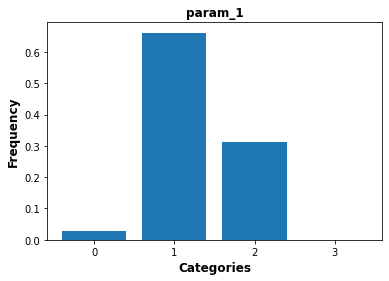

   param_2
0   0.0253
1   0.6575
2   0.3172
3   0.0000


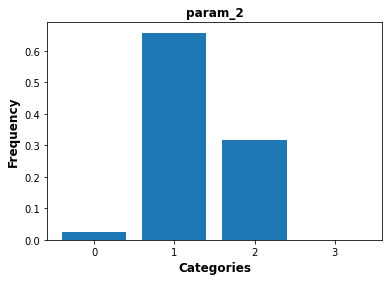

   param_3
0   0.0258
1   0.6613
2   0.3129
3   0.0000


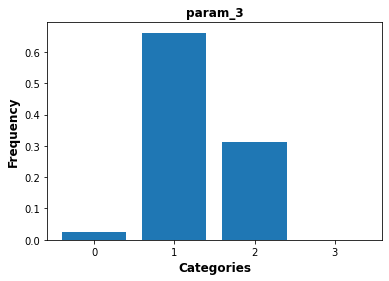

   param_4
0   0.0319
1   0.6550
2   0.3131
3   0.0000


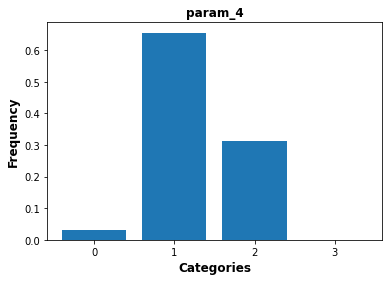

   param_5
0   0.0330
1   0.6571
2   0.3099
3   0.0000


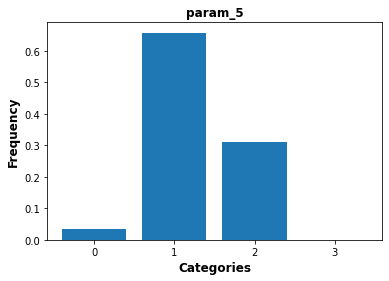

   param_6
0   0.0348
1   0.6487
2   0.3165
3   0.0000


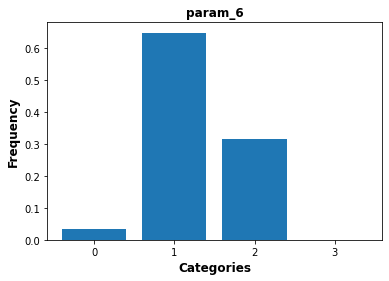

   param_7
0   0.0445
1   0.6450
2   0.3105
3   0.0000


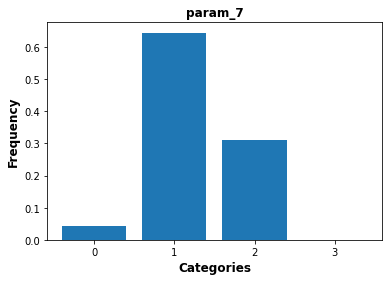

   param_8
0   0.0571
1   0.6311
2   0.3118
3   0.0000


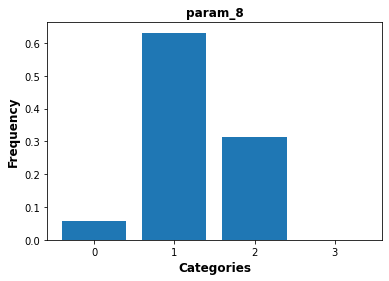

   param_9
0   0.0739
1   0.6102
2   0.3159
3   0.0000


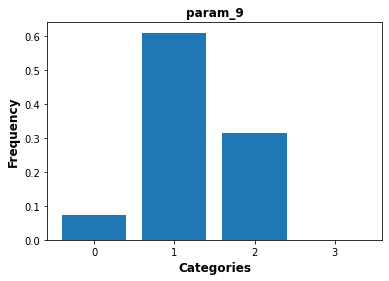

   param_10
0    0.1725
1    0.5059
2    0.3216
3    0.0000


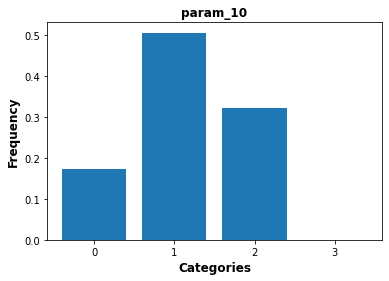

   param_11
0    0.1712
1    0.5095
2    0.3193
3    0.0000


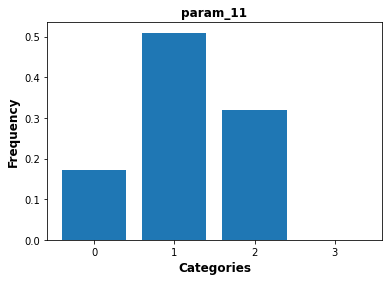

   param_12
0    0.1947
1    0.4588
2    0.3080
3    0.0385


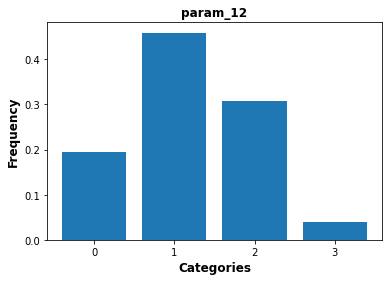

   param_13
0    0.2181
1    0.4073
2    0.2898
3    0.0848


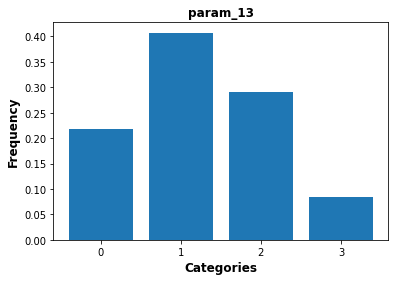

   param_14
0    0.2327
1    0.3486
2    0.2646
3    0.1541


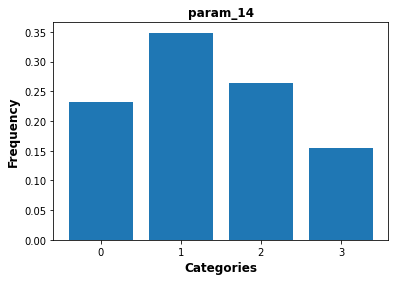

   param_15
0    0.2586
1    0.2710
2    0.2476
3    0.2228


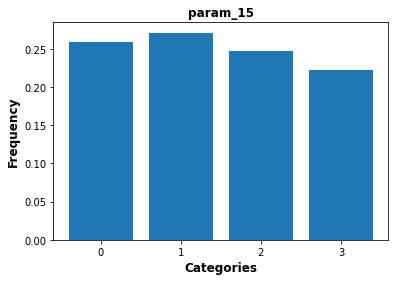

   param_16
0    0.2792
1    0.1845
2    0.2179
3    0.3184


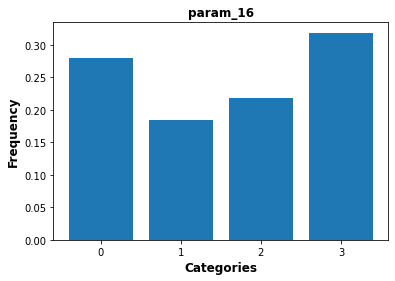

   param_17
0    0.2841
1    0.1079
2    0.1825
3    0.4255


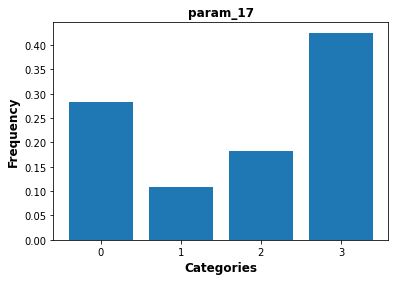

   param_18
0    0.2596
1    0.0602
2    0.1439
3    0.5363


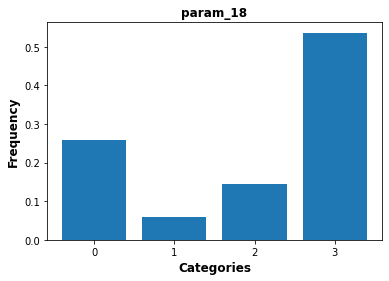

   param_19
0    0.2068
1    0.0201
2    0.1057
3    0.6674


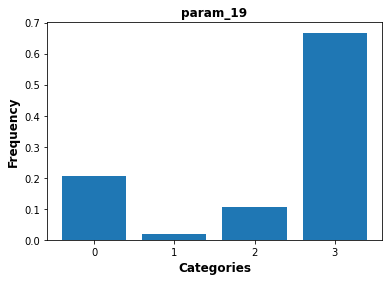

   param_20
0    0.0970
1    0.0000
2    0.0424
3    0.8606


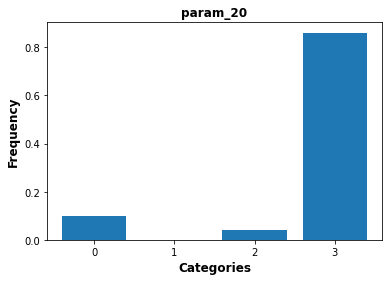

In [45]:
for i in range(1,21):
    freq = results_df[f'param_{i}'].value_counts(normalize=True).sort_index(ascending=True)
    print(freq.to_frame())
    cat = results_df["param_1"].cat.categories
    plt.bar(cat, freq)
    plt.xticks(cat,freq.index)
    plt.xlabel("Categories", {'fontsize':12,'fontweight':"bold"})
    plt.ylabel("Frequency", {'fontsize':12,'fontweight':"bold"})
    plt.title(f'param_{i}', {'fontsize':12,'fontweight':"bold"})
    plt.show()

In [46]:
freq = {}
for i in results_df.columns:
    freq[i] = dict(results_df[i].value_counts().sort_index(ascending = True))
freq_df = pd.DataFrame(freq)
freq_df

,param_1,param_2,param_3,param_4,param_5,param_6,param_7,param_8,param_9,param_10,param_11,param_12,param_13,param_14,param_15,param_16,param_17,param_18,param_19,param_20
0,278,253,258,319,330,348,445,571,739,1725,1712,1947,2181,2327,2586,2792,2841,2596,2068,970
1,6612,6575,6613,6550,6571,6487,6450,6311,6102,5059,5095,4588,4073,3486,2710,1845,1079,602,201,0
2,3110,3172,3129,3131,3099,3165,3105,3118,3159,3216,3193,3080,2898,2646,2476,2179,1825,1439,1057,424
3,0,0,0,0,0,0,0,0,0,0,0,385,848,1541,2228,3184,4255,5363,6674,8606


### Some visualizations

Text(0, 0.5, 'Frequency')

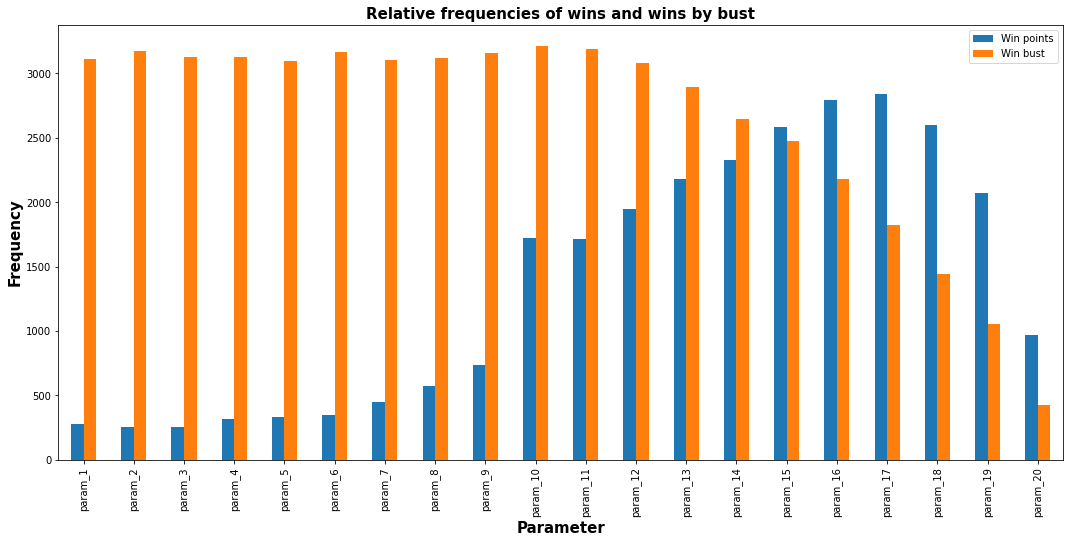

In [48]:
win_points = list(freq_df.iloc[0]) # 0: win_points
win_bust = list(freq_df.iloc[2]) # 2: win_bust
param = results_df.columns
df = pd.DataFrame({'Win points': win_points,'Win bust': win_bust}, index=param)
ax = df.plot.bar(rot=90,figsize=(18, 8))
plt.title('Relative frequencies of wins and wins by bust', {'fontsize':15,'fontweight':"bold"})
plt.xlabel("Parameter", {'fontsize':15,'fontweight':"bold"})
plt.ylabel("Frequency", {'fontsize':15,'fontweight':"bold"})

In [58]:
def prob(param):
    sum = 0
    res = []
    for i in range(1, len(param) + 1):
        if param[i-1] == 0 or param[i-1] == 2:
            sum += 1
        res.append(sum/i)
    return res

In [59]:
x = [i for i in range(1,10001)]
y = {}
for i in range(1,21):
    y[i] = prob(results_df[f"param_{i}"])  

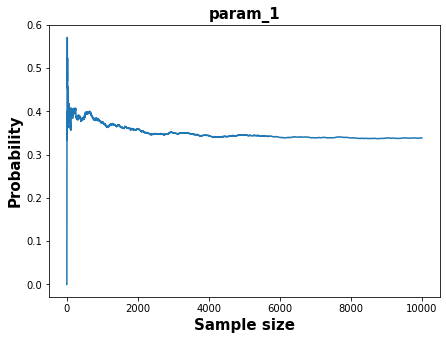

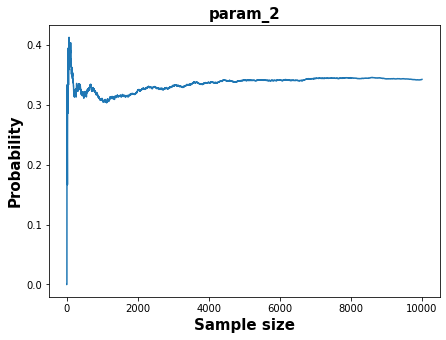

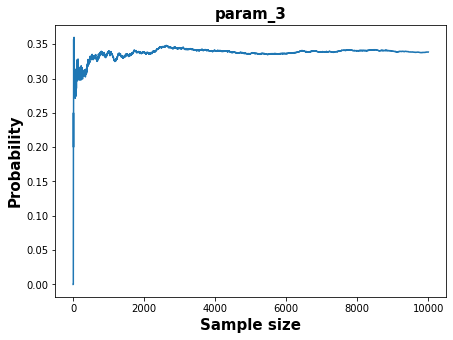

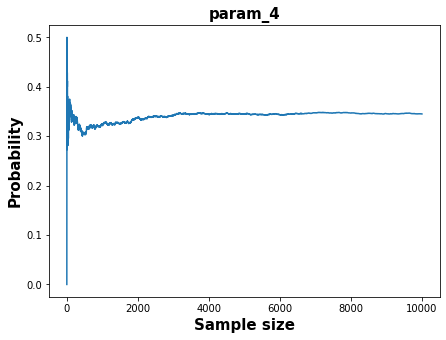

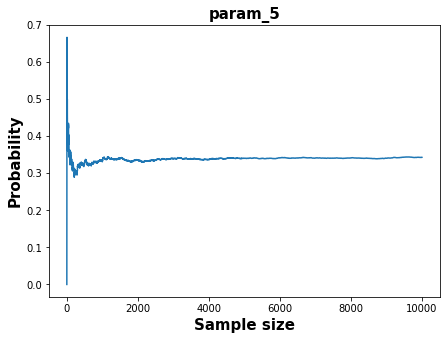

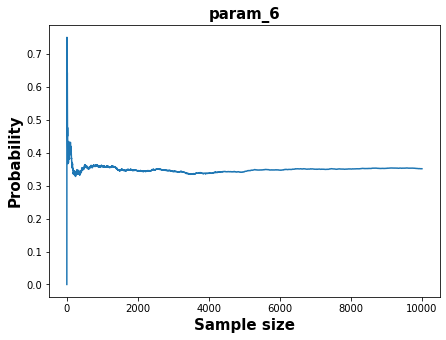

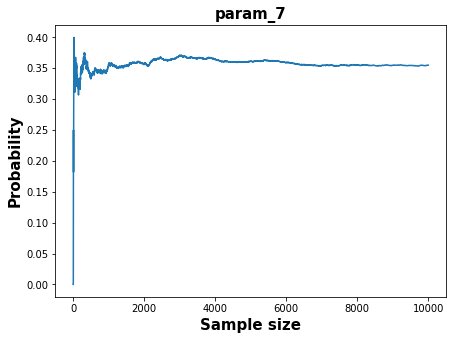

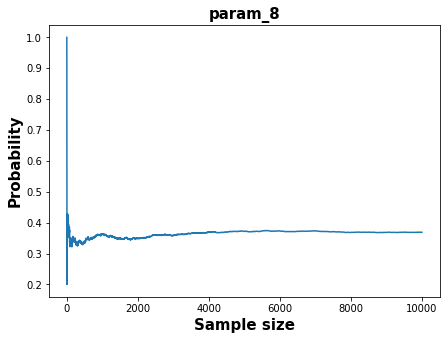

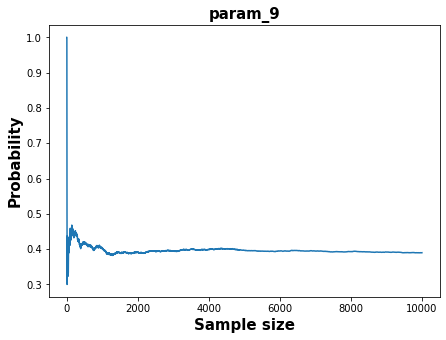

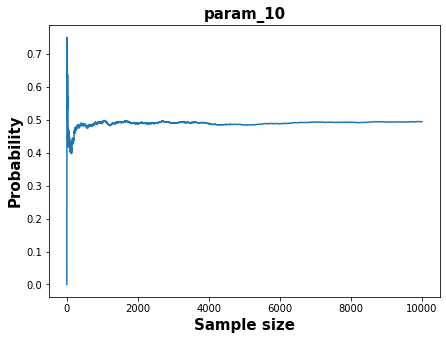

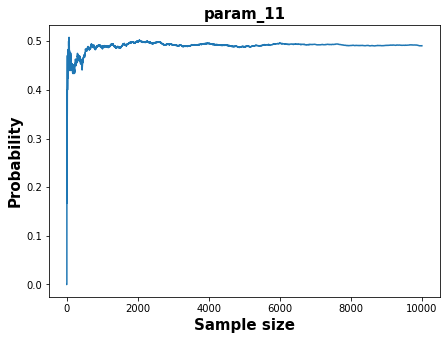

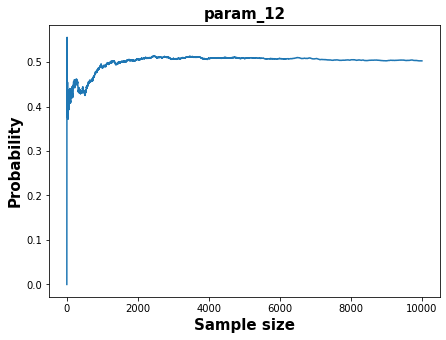

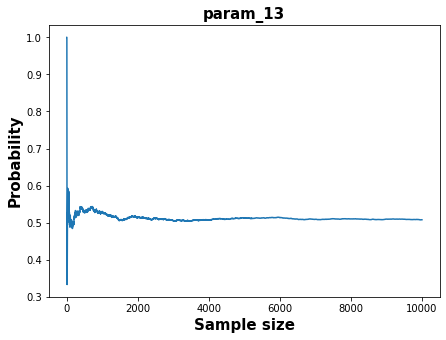

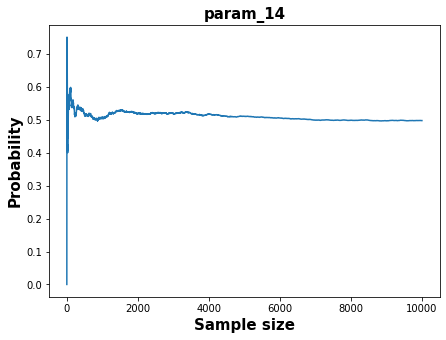

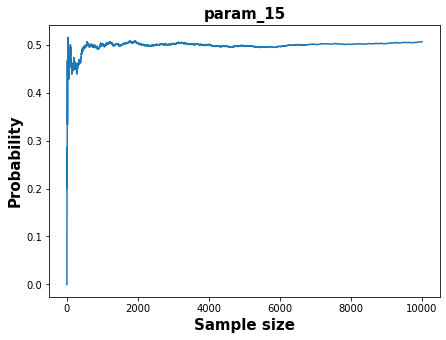

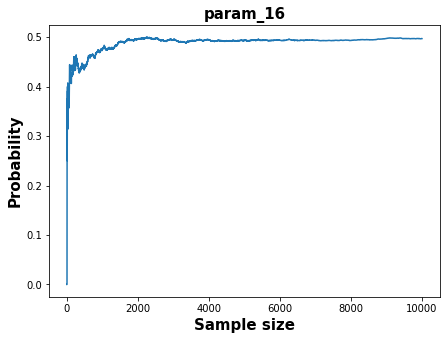

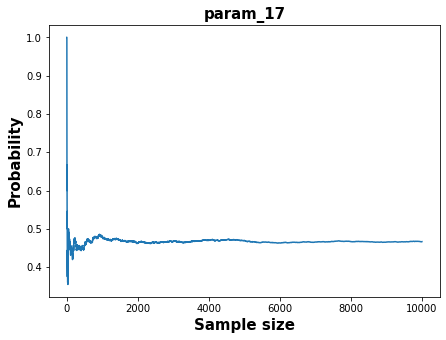

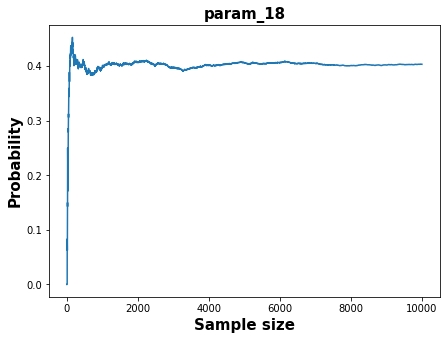

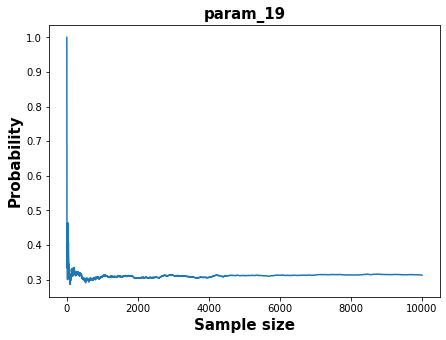

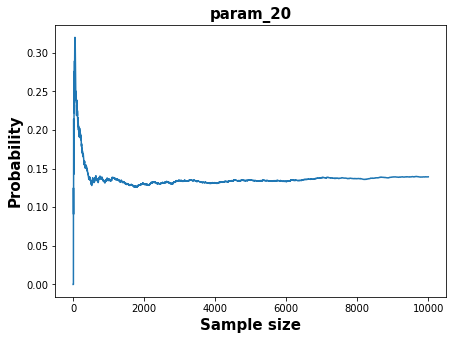

In [68]:
for i in range(1,21):
    plt.figure(figsize = (7,5))
    plt.plot(x, y[i])
    plt.title(f"param_{i}", {'fontsize':15,'fontweight':"bold"})
    plt.xlabel('Sample size',{'fontsize':15,'fontweight':"bold"})
    plt.ylabel('Probability', {'fontsize':15,'fontweight':"bold"})
    plt.show();

### So, based on our computations and visualizations, we can conclude that most likely parameters to win are 13,14,16,17.